# DS-SF-25 | Codealong 03 | Descriptive Statistics for Exploratory Data Analysis

In [1]:
import os
import math
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

/Users/robert.baldwin/Library/Developer/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-03-starter.csv'), index_col = 'ID')

In [3]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,NaN,550.0,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,2.0,1430.0,2435.0,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,3.5,2040.0,3920.0,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,1.0,1060.0,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,2.0,1299.0,NaN,1993.0
15064295,"111 Chestnut St APT 702, San Francisco, CA",12/17/15,940000.0,0.0,2.0,2.0,1033.0,NaN,1993.0
15064391,"1821 Grant Ave APT 101, San Francisco, CA",12/15/15,835000.0,0.0,1.0,1.0,1048.0,NaN,1975.0
15064536,"2300 Leavenworth St, San Francisco, CA",12/4/15,2830000.0,0.0,3.0,2.0,2115.0,1271.0,1913.0
15064640,"1047-1049 Lombard St, San Francisco, CA",1/14/16,4050000.0,1.0,NaN,NaN,4102.0,3049.0,1948.0


## Part A

- `.mean()`
- `.var()`, `.std()`

### `Series.mean()` - Compute the `Series` mean value

In [73]:
df.SalePrice.mean()

1397422.943

> What's `Size`'s mean?

In [5]:
df.Size.mean()

1641.3009307135471

> What's fraction of the properties sold in the dataset are studios?

In [10]:
df.IsAStudio.sum() / df.IsAStudio.shape[0]

0.029

### `DataFrame.mean()` - Compute the `DataFrame` mean value

In [11]:
df.mean()

SalePrice      1.397423e+06
IsAStudio      2.941176e-02
BedCount       2.572967e+00
BathCount      1.977548e+00
Size           1.641301e+03
LotSize        3.020640e+03
BuiltInYear    1.947533e+03
dtype: float64

`DataFrame.mean()` only applies to numerical columns.  Address and date of sales aren't included.

### `.var()` - Compute the unbiased variance (normalized by `N-1` by default)

In [12]:
df.var()

SalePrice      3.015131e+12
IsAStudio      2.857569e-02
BedCount       1.564729e+00
BathCount      1.277654e+00
Size           1.054762e+06
LotSize        8.142064e+06
BuiltInYear    1.445639e+03
dtype: float64

> What's the variance for the number of beds in the dataset?

In [13]:
df.BedCount.var()

1.5647293928888621

### `.std()` - Compute the unbiased standard deviation (normalized by `N-1` by default)

In [15]:
df.BedCount.std()

1.2508914392899417

> What's the standard deviation for the number of beds in the dataset?

In [17]:
df.BedCount.std()

1.2508914392899417

## Part B

- `.median()`
- `.count()`, `.dropna()`, `.isnull()`
- `.min()`, `.max()`
- `.quantile()`
- `.describe()`

### `.median()` - Compute the median value

In [18]:
df.median()

SalePrice      1100000.0
IsAStudio            0.0
BedCount             2.0
BathCount            2.0
Size              1350.0
LotSize           2622.0
BuiltInYear       1939.0
dtype: float64

> What's the median sale price for properties in the dataset?

In [19]:
df.SalePrice.median()

1100000.0

### `.count()` - Compute the number of rows/observations without `NaN` and `.sum()` - Compute the sum of the values

In [20]:
df.count()

Address        1000
DateOfSale     1000
SalePrice      1000
IsAStudio       986
BedCount        836
BathCount       942
Size            967
LotSize         556
BuiltInYear     975
dtype: int64

In [21]:
df.IsAStudio.count()

986

`count()` counts the number of non-`NaN` values:

In [22]:
df.IsAStudio.dropna().shape[0]

986

In [23]:
df.IsAStudio.isnull().sum()

14

Which leaves 14 houses for which we don't know if they are studios or not.

In [24]:
df.IsAStudio.dropna().shape[0] + df.IsAStudio.isnull().sum()

1000

In [25]:
df.IsAStudio.sum()

29.0

29 properties are studios.

### `.min()` and `.max()` - Compute the minimum and maximum values

In [26]:
df.min()

Address        1 Crescent Way APT 1402, San Francisco, CA
DateOfSale                                        1/10/16
SalePrice                                               1
IsAStudio                                               0
BedCount                                                1
BathCount                                               1
Size                                                  264
LotSize                                                44
BuiltInYear                                          1870
dtype: object

> What are properties that were sold at the lowest price?  At what price?

In [38]:
df[ df.SalePrice == df.SalePrice.min() ]

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15149005,"251-253 Missouri St, San Francisco, CA",12/23/15,1.0,0.0,7.0,6.0,2904.0,2482.0,1900.0


In [35]:
df.max()

Address        San Carlos St, Carmel, CA
DateOfSale                        2/9/16
SalePrice                       3.27e+07
IsAStudio                              1
BedCount                               9
BathCount                             14
Size                               11500
LotSize                            47916
BuiltInYear                         2015
dtype: object

> What are properties that were sold at the highest price?  At what price?

In [39]:
df[ df.SalePrice == df.SalePrice.max() ]

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15083161,"1825 Scott St, San Francisco, CA",11/23/15,32700000.0,0.0,NaN,1.0,1100.0,1694.0,1900.0


### `.quantile()` - Compute values at the given quantile

/Users/robert.baldwin/Library/Developer/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


SalePrice      1100000.0
IsAStudio            NaN
BedCount             NaN
BathCount            NaN
Size                 NaN
LotSize              NaN
BuiltInYear          NaN
dtype: float64

In [41]:
df.median()

SalePrice      1100000.0
IsAStudio            0.0
BedCount             2.0
BathCount            2.0
Size              1350.0
LotSize           2622.0
BuiltInYear       1939.0
dtype: float64

In [ ]:
df.quantile(.25)

In [ ]:
df.quantile(.75)

### `.describe()` - Generate various summary statistics

In [ ]:
df.describe()

In [ ]:
df.SalePrice.describe()

## Part C

- Boxplots

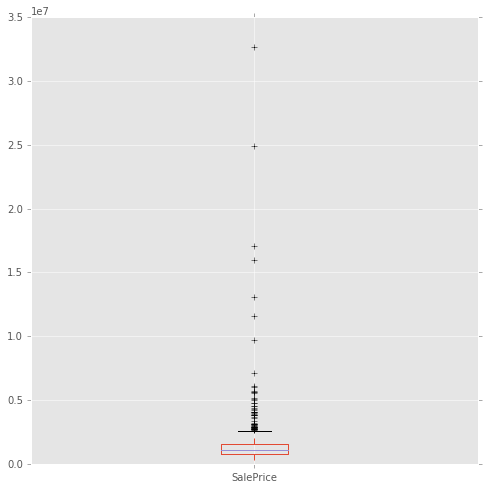

In [42]:
df.SalePrice.plot(kind = 'box', figsize = (8, 8))

> In the same plot, plot the boxplots of `BedCount` and `BathCount`

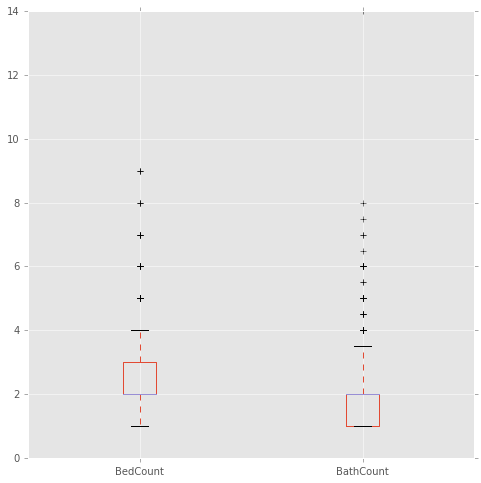

In [47]:
df[ ['BedCount', 'BathCount'] ].plot(kind = 'box', figsize = (8, 8))

## Part D

- Histograms

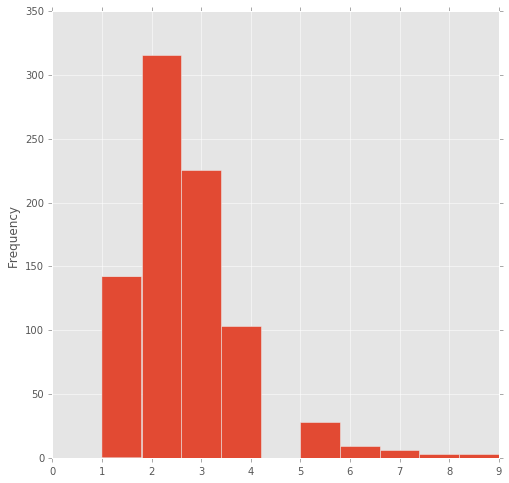

In [48]:
df.BedCount.plot(kind = 'hist', figsize = (8, 8))

> In the same plot, plot the histograms of `BedCount` and `BathCount`

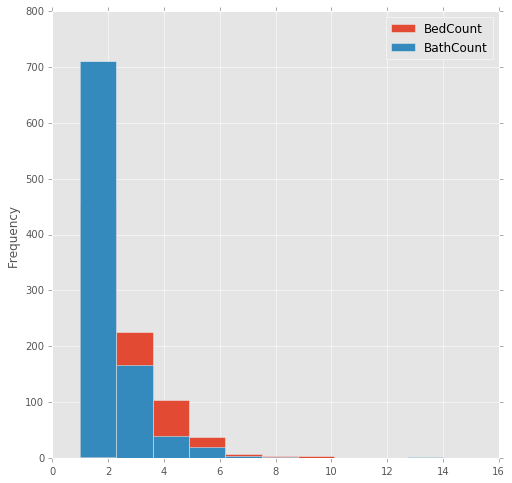

In [49]:
df[ ['BedCount', 'BathCount'] ].plot(kind = 'hist', figsize = (8, 8))

## Part E

- `.mode()`

### `.mode()` - Compute the mode value(s)

In [50]:
df.mode()

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
0,"1 Mono St # B, San Francisco, CA",11/20/15,1100000.0,0.0,2.0,1.0,1000.0,2495.0,1900.0
1,"150 Grand View Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1915 Diamond St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1954 Golden Gate Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2299 Market St APT 502, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"643 Natoma St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"829 Folsom St UNIT 906, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html): Gets the mode(s) of each element along the columns.  Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with `NaN`.  Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.

In [51]:
df.Address[df.Address == '1 Mono St # B, San Francisco, CA']

ID
59700333    1 Mono St # B, San Francisco, CA
59779608    1 Mono St # B, San Francisco, CA
Name: Address, dtype: object

In [52]:
df.Address[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

ID
123597964     829 Folsom St UNIT 906, San Francisco, CA
2121978635    829 Folsom St UNIT 906, San Francisco, CA
Name: Address, dtype: object

In [53]:
df[df.DateOfSale == '11/20/15'].shape[0]

47

In [54]:
(df.DateOfSale == '11/20/15').sum()

47

## Part F

- `.corr()`
- Heatmaps
- Scatter plots
- Scatter matrices

In [55]:
corr = df.corr()

corr

,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
BedCount,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
BathCount,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


### Heatmaps

Let's pretty this up.

In [58]:
list(corr.columns)

['SalePrice',
 'IsAStudio',
 'BedCount',
 'BathCount',
 'Size',
 'LotSize',
 'BuiltInYear']

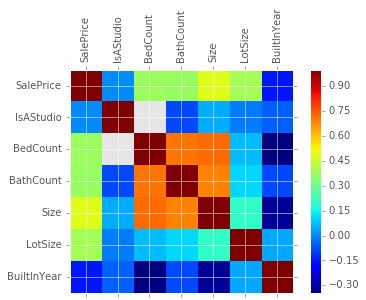

In [59]:
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

### Scatter plots

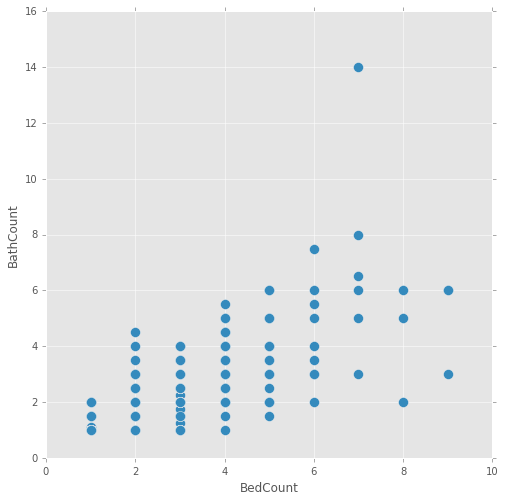

In [60]:
df[ ['BedCount', 'BathCount'] ].plot(kind = 'scatter', x = 'BedCount', y = 'BathCount', s = 100, figsize = (8, 8))

### Scatter matrices

In [ ]:
pd.tools.plotting.scatter_matrix(df[ ['BedCount', 'BathCount'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

In [ ]:
pd.tools.plotting.scatter_matrix(df[ ['SalePrice', 'Size'] ], s = 200, figsize = (8, 8))

## Part G

- `.value_counts()`
- `.crosstab()`

> Reproduce the `BedCount` histogram above.  For each possible bed count, how many properties share that bed count?

In [61]:
df.BedCount.value_counts()

2.0    316
3.0    226
1.0    142
4.0    103
5.0     28
6.0      9
7.0      6
9.0      3
8.0      3
Name: BedCount, dtype: int64

> Careful on checking for `NaN` values

In [ ]:
# TODO

> Create a frequency table for `BathCount` over `BedCount`.

In [66]:
pd.crosstab(df.BathCount, df.BedCount)

BedCount,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
BathCount,,,,,,,,,
1.00,116,133,39,1,0,0,0,0,0
1.10,1,0,0,0,0,0,0,0,0
1.25,0,0,1,0,0,0,0,0,0
1.50,7,19,9,1,1,0,0,0,0
1.75,0,0,1,0,0,0,0,0,0
2.00,17,140,103,21,3,1,0,1,0
2.25,0,0,1,0,0,0,0,0,0
2.50,0,11,22,9,1,0,0,0,0
3.00,0,8,36,38,8,2,1,0,1
